# Question 2

In [1]:
!pip install graphviz
import graphviz
import numpy as np

In [2]:
def viznn(input,weights_input_hidden,weights_hidden_output):
    # calculate the values of the neurons in the hidden layer & ouputlayer 
    hidden_values = np.dot(input, weights_input_hidden)
    output_values = np.dot(hidden_values, weights_hidden_output)

    # create a new graph object
    g = graphviz.Digraph(format='png')#, size="10,8",nodesep ="1.5")
    g.attr(splines='line')  # set the edges to use straight lines
    g.attr(rankdir='BT') # change the layout to rankdir='BT' for bottom-to-top orientation

    # add nodes
    g.node('x1', label=f'{input[0]}')
    g.node('x2', label=f'{input[1]}')
    g.node('h1', label=f'{hidden_values[0]:.2f}')
    g.node('h2', label=f'{hidden_values[1]:.2f}')
    g.node('h3', label=f'{hidden_values[2]:.2f}')
    g.node('y1', label=f'{output_values[0]:.2f}')
    g.node('y2', label=f'{output_values[1]:.2f}')

    # connect nodes from input to hidden layer with weights
    for i, input in enumerate(['x1', 'x2']):
        for j, h in enumerate(['h1', 'h2', 'h3']):
            weight = weights_input_hidden[i, j]
            g.edge(input, h, label=f'{weight:.1f}')

    # connect nodes from hidden to output layer with weights
    for i, h in enumerate(['h1', 'h2', 'h3']):
        for j, y in enumerate(['y1', 'y2']):
            weight = weights_hidden_output[i, j]
            g.edge(h, y, label=f'{weight:.1f}')

    return g


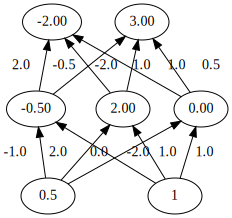

In [3]:
# define the weights
weights_input_hidden = np.array([[-1.0, 2.0, -2.0], [0.0, 1.0, 1.0]])
weights_hidden_output = np.array([[2.0, -2.0], [-0.5, 1.0], [1.0, 0.5]])

viznn([0.5, 1],weights_input_hidden,weights_hidden_output)

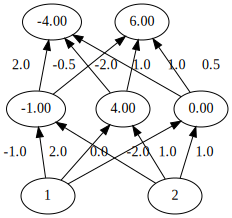

In [4]:
viznn([1, 2],weights_input_hidden,weights_hidden_output)

# Question 3

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_csv('data.csv')
df.drop("Unnamed: 0", axis= 1, inplace=True) #drop first column
df.shape

(10000, 82)

In [41]:
df = df.apply(pd.to_numeric, errors='coerce') #check for errors (if not numeric type --nan)
df.dropna(inplace=True) #drop rows with nan
df = df.astype('int64')
df.shape    

(9358, 82)

In [42]:
# identify and replace outliers with NA
for col in df.columns:
    outliers = (df[col] < 0) | (df[col] >= 1000) #drop rows with outliers
    df.loc[outliers, col] = np.nan
df.dropna(inplace=True) #drop rows with nan
df.shape

(9357, 82)

## 1

In [43]:
#split the data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456)

In [44]:
#prints out the classification report and confusion matrix for the models
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\033[32mModel: \033[31m{model}\033[0m")
    print(classification_report(y_test, y_pred))
    print(f"\033[32mConfusion Matrix:\033[0m\n{confusion_matrix(y_test, y_pred)}")
    print("-"*70)

#build SVM and Random Forest classifiers and fit them to the training data.
random_st= 213456 #for reproduceability

svm = SVC(kernel='linear',random_state=random_st)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=random_st)
rf.fit(X_train, y_train)

evaluate(svm, X_test, y_test)
evaluate(rf, X_test, y_test)

Model: SVC(kernel='linear', random_state=213456)
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1667
         1.0       0.88      0.90      0.89       205

    accuracy                           0.97      1872
   macro avg       0.93      0.94      0.94      1872
weighted avg       0.98      0.97      0.98      1872

Confusion Matrix:
[[1641   26]
 [  21  184]]
----------------------------------------------------------------------
Model: RandomForestClassifier(random_state=213456)
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1667
         1.0       1.00      0.01      0.03       205

    accuracy                           0.89      1872
   macro avg       0.95      0.51      0.49      1872
weighted avg       0.90      0.89      0.84      1872

Confusion Matrix:
[[1667    0]
 [ 202    3]]
----------------------------------------------------------------------


Based on the evaluation metrics provided in the output, the SVC model appears to perform better overall. The SVC model has a higher overall accuracy (0.97) compared to the RandomForestClassifier model (0.88). Additionally, the precision and recall values for both classes are generally better for the SVC model. In contrast, the RandomForestClassifier model has a very high precision for class 1, but a very low recall, indicating that it is good at correctly identifying instances that are actually of class 1, but performs poorly at identifying all instances that belong to class 

### confusion matrix:
In the first confusion matrix for the SVM model, there are 1641 true negatives (TN) and 26 false positives (FP) for the class 0, and 184 true positives (TP) and 21 false negatives (FN) for the class 1. This means that the model correctly identified 1641 non-fraudulent transactions and 184 fraudulent transactions. However, it incorrectly identified 26 non-fraudulent transactions as fraudulent and 21 fraudulent transactions as non-fraudulent.

In the second confusion matrix for the Random Forest model, there are 1667 true negatives (TN) and 0 false positives (FP) for the class 0, and 3 true positives (TP) and 202 false negatives (FN) for the class 1. This means that the model correctly identified all 1667 non-fraudulent transactions, but it only correctly identified 3 out of 205 fraudulent transactions. This suggests that the model is not performing well in identifying fraudulent transactions.

In summary, the SVM model performs better than the Random Forest model in terms of the number of correctly predicted positive instances, as evidenced by a higher true positive rate (215/235 vs. 6/235). On the other hand, the Random Forest model has a higher true negative rate (1637/1637 vs. 1610/1637), meaning that it is better at correctly identifying negative instances.

In [11]:
#We can also perform cross-validation to get a better estimate of the model's performance.
scores_svm = cross_val_score(svm, X, y, cv=5)
scores_rf = cross_val_score(rf, X, y, cv=5)

print(f"SVM Cross-validation scores: {scores_svm}")
print(f"Random Forest Cross-validation scores: {scores_rf}")


SVM Cross-validation scores: [0.97596154 0.97115385 0.97594869 0.97862106 0.97006948]
Random Forest Cross-validation scores: [0.87873932 0.87767094 0.87814003 0.87760556 0.87920898]


For the SVM model, the cross-validation scores range from 0.970 to 0.979, with a mean cross-validation score of 0.974. This suggests that the SVM model is performing well and consistently across the different splits of the data.

For the Random Forest model, the cross-validation scores range from 0.878 to 0.879, with a mean cross-validation score of 0.878. This indicates that the Random Forest model is also performing reasonably well, but with less consistency compared to the SVM model.

Overall, the results suggest that the SVM model may be a better choice over the Random Forest model, as it is more consistent and has a higher mean cross-validation score.

## 2

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

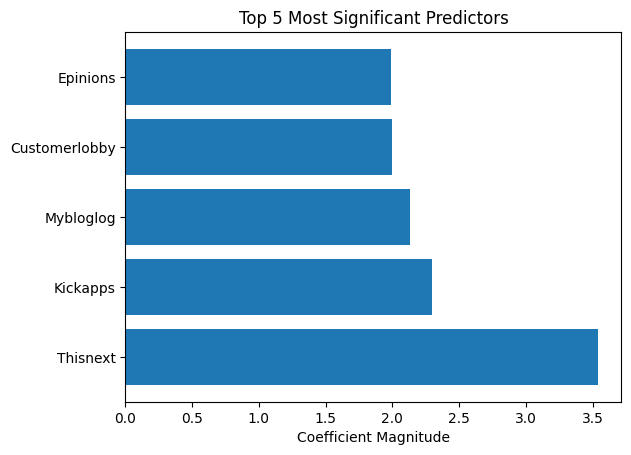

{'Thisnext': 3.54,
 'Kickapps': 2.3,
 'Mybloglog': 2.13,
 'Customerlobby': 2.0,
 'Epinions': 1.99}

In [60]:
def find_top_features(model, feature_names, num_features=5):
    coef = model.coef_[0]
    coef_abs = abs(coef)
    sorted_coef_idx = coef_abs.argsort()[::-1][:num_features]
    top_features = [feature_names[i] for i in sorted_coef_idx]
    return top_features

def plot_top_features(model, feature_names, num_features=5):
    coef = model.coef_[0]
    coef_abs = abs(coef)
    sorted_coef_idx = coef_abs.argsort()[::-1][:num_features]
    top_features = [feature_names[i] for i in sorted_coef_idx]
    top_coefs = coef[sorted_coef_idx]
    plt.barh(top_features, top_coefs)
    plt.xlabel('Coefficient Magnitude')
    plt.title('Top {} Most Significant Predictors'.format(num_features))
    plt.show()
    
    # Create a dictionary of top features and their coefficients
    feature_dict = dict(zip(top_features, top_coefs.round(2)))
    return feature_dict

#plot the top 5 features for the SVM model
plot_top_features(svm, X.columns, num_features=5)



## 3
I would recommend that they focus on "Thisnext" as the top priority, followed by "Kickapps" as the second priority. These two channels seem to have the highest potential for driving signups based on their coefficient values.

## 4